In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Reading the Cardiovasular  data set 
data = pd.read_csv(r'C:\Users\prama\Desktop\Project files\Projects\CardiovascularDiseaseDetection\cardio_train.csv')

In [77]:
data.head()

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,988;22469;1;155;69.0;130;80;2;2;0;0;1;0
1,989;14648;1;163;71.0;110;70;1;1;0;0;1;1
2,990;21901;1;165;70.0;120;80;1;1;0;0;1;0
3,991;14549;2;165;85.0;120;80;1;1;1;1;1;0
4,992;23393;1;155;62.0;120;80;1;1;0;0;1;0


In [78]:
data.columns

Index(['id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio'], dtype='object')

In [79]:
#Here our columns are given in as text in single column; lets try to change it to text to columns
#After changing save it as .csv file and again read  that file.

In [3]:
data = pd.read_csv(r'C:\Users\prama\Desktop\Project files\Projects\CardiovascularDiseaseDetection\cardio_trainnew.csv')

In [4]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [5]:
data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69296,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69297,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69298,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69299,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69300,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [6]:
#Lets check the data set using describe method
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#Great there are no missing values in our data set.

In [8]:
data['ap_hi'] = data['ap_hi'].replace(-150,data['ap_hi'].median())
data['ap_lo'] = data['ap_lo'].replace(-70,data['ap_lo'].median())

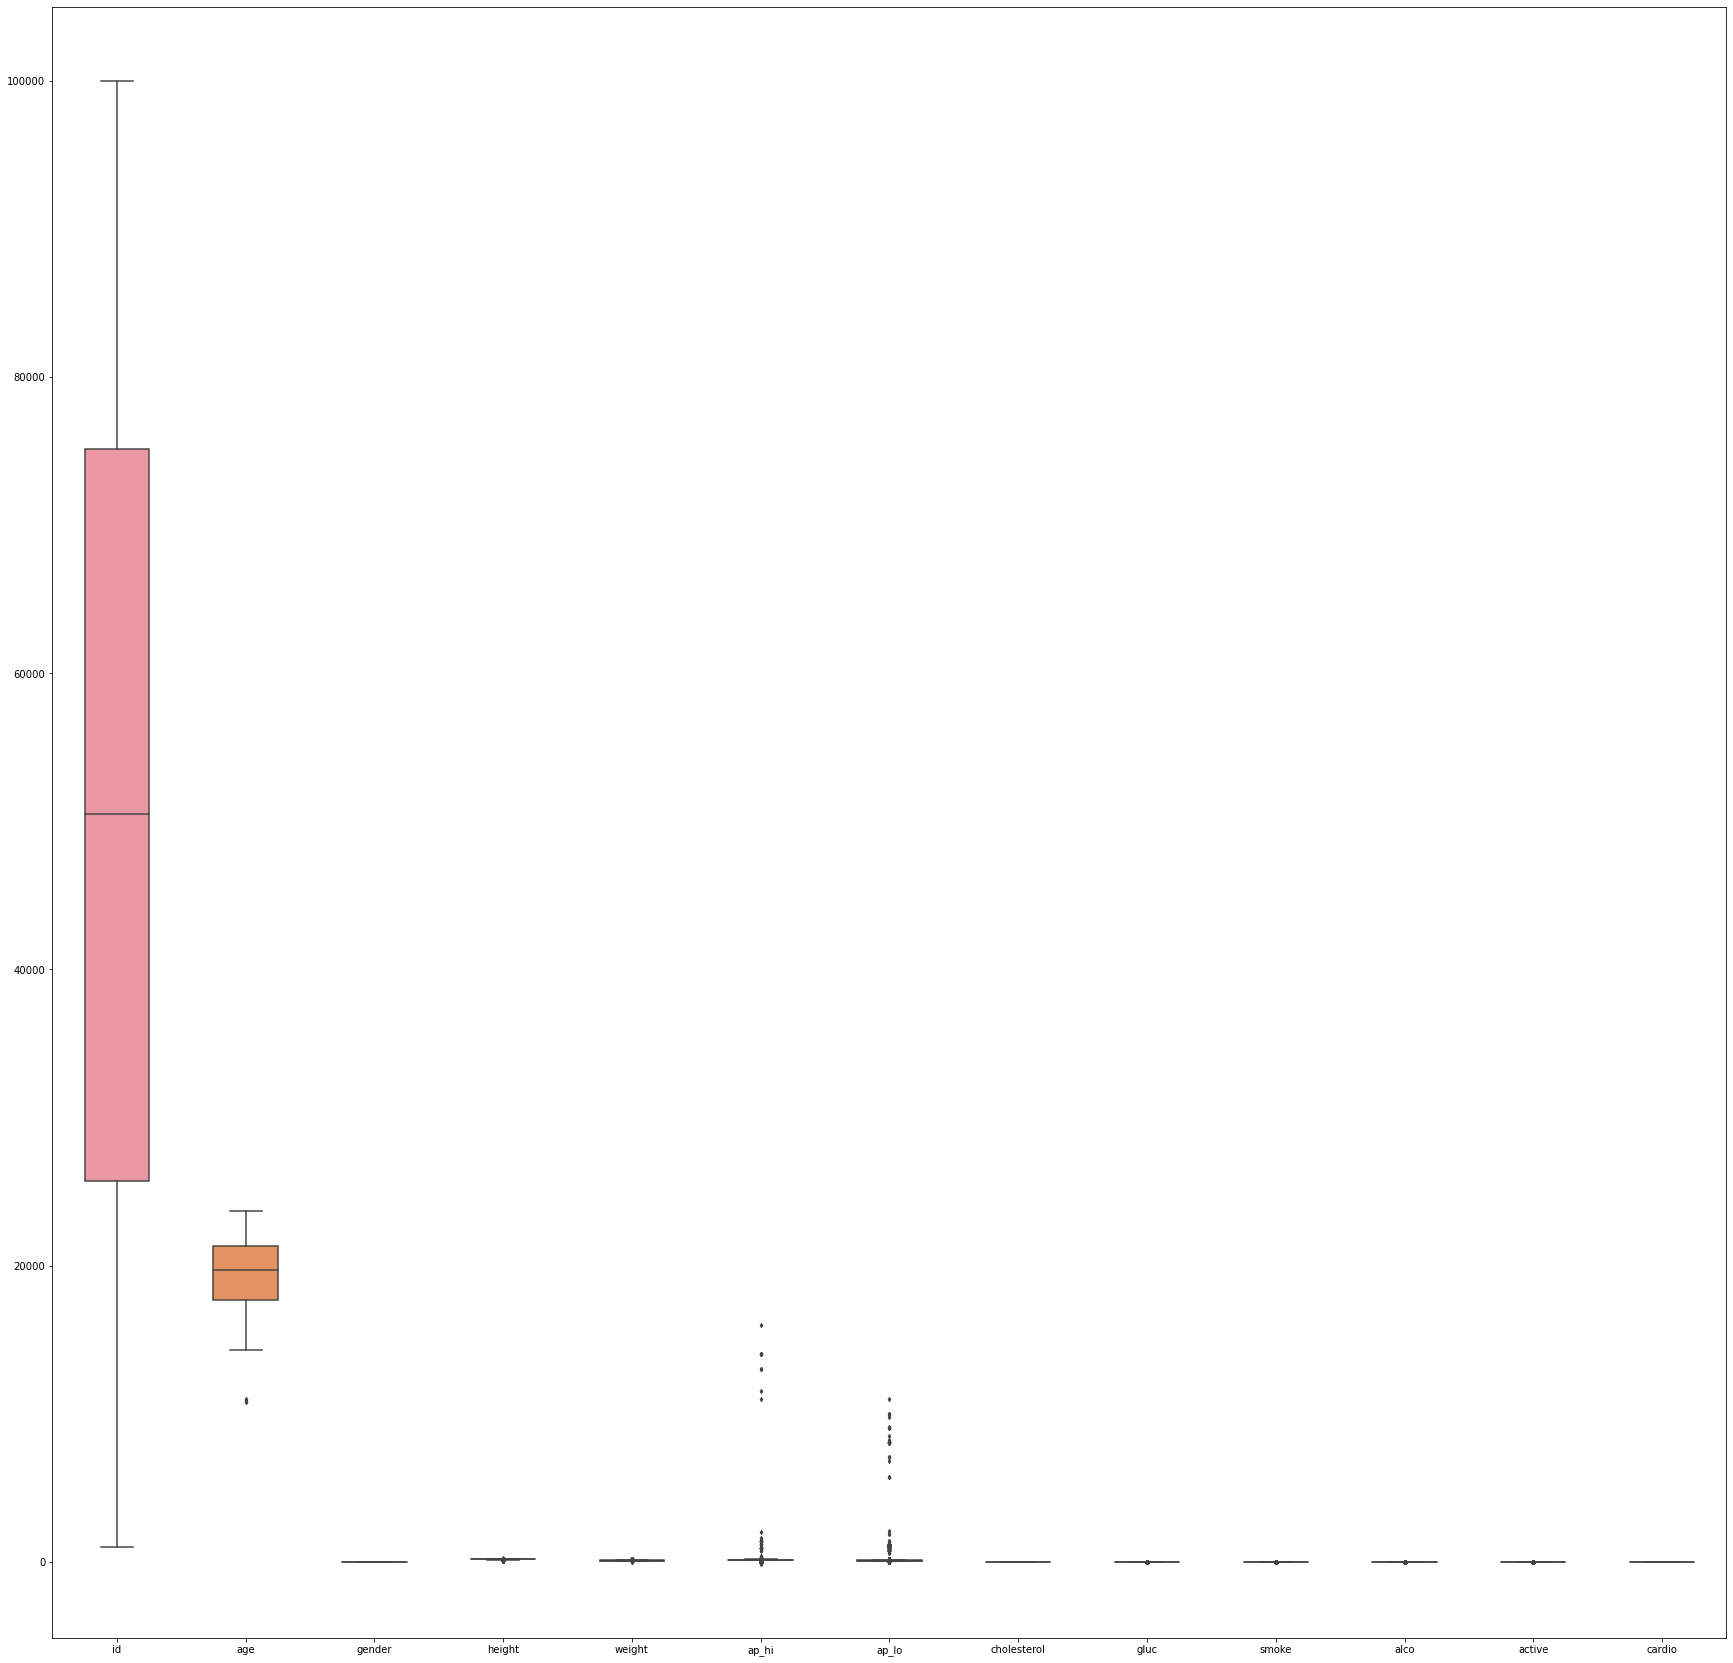

In [9]:
fig, ax = plt.subplots(figsize=(30,30))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [10]:
q = data['ap_hi'].quantile(0.80)
# we are removing the top 7% data from the Pregnancies column
data_cleaned = data[data['ap_hi']<q]
q = data_cleaned['ap_lo'].quantile(0.85)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['ap_lo']<q]

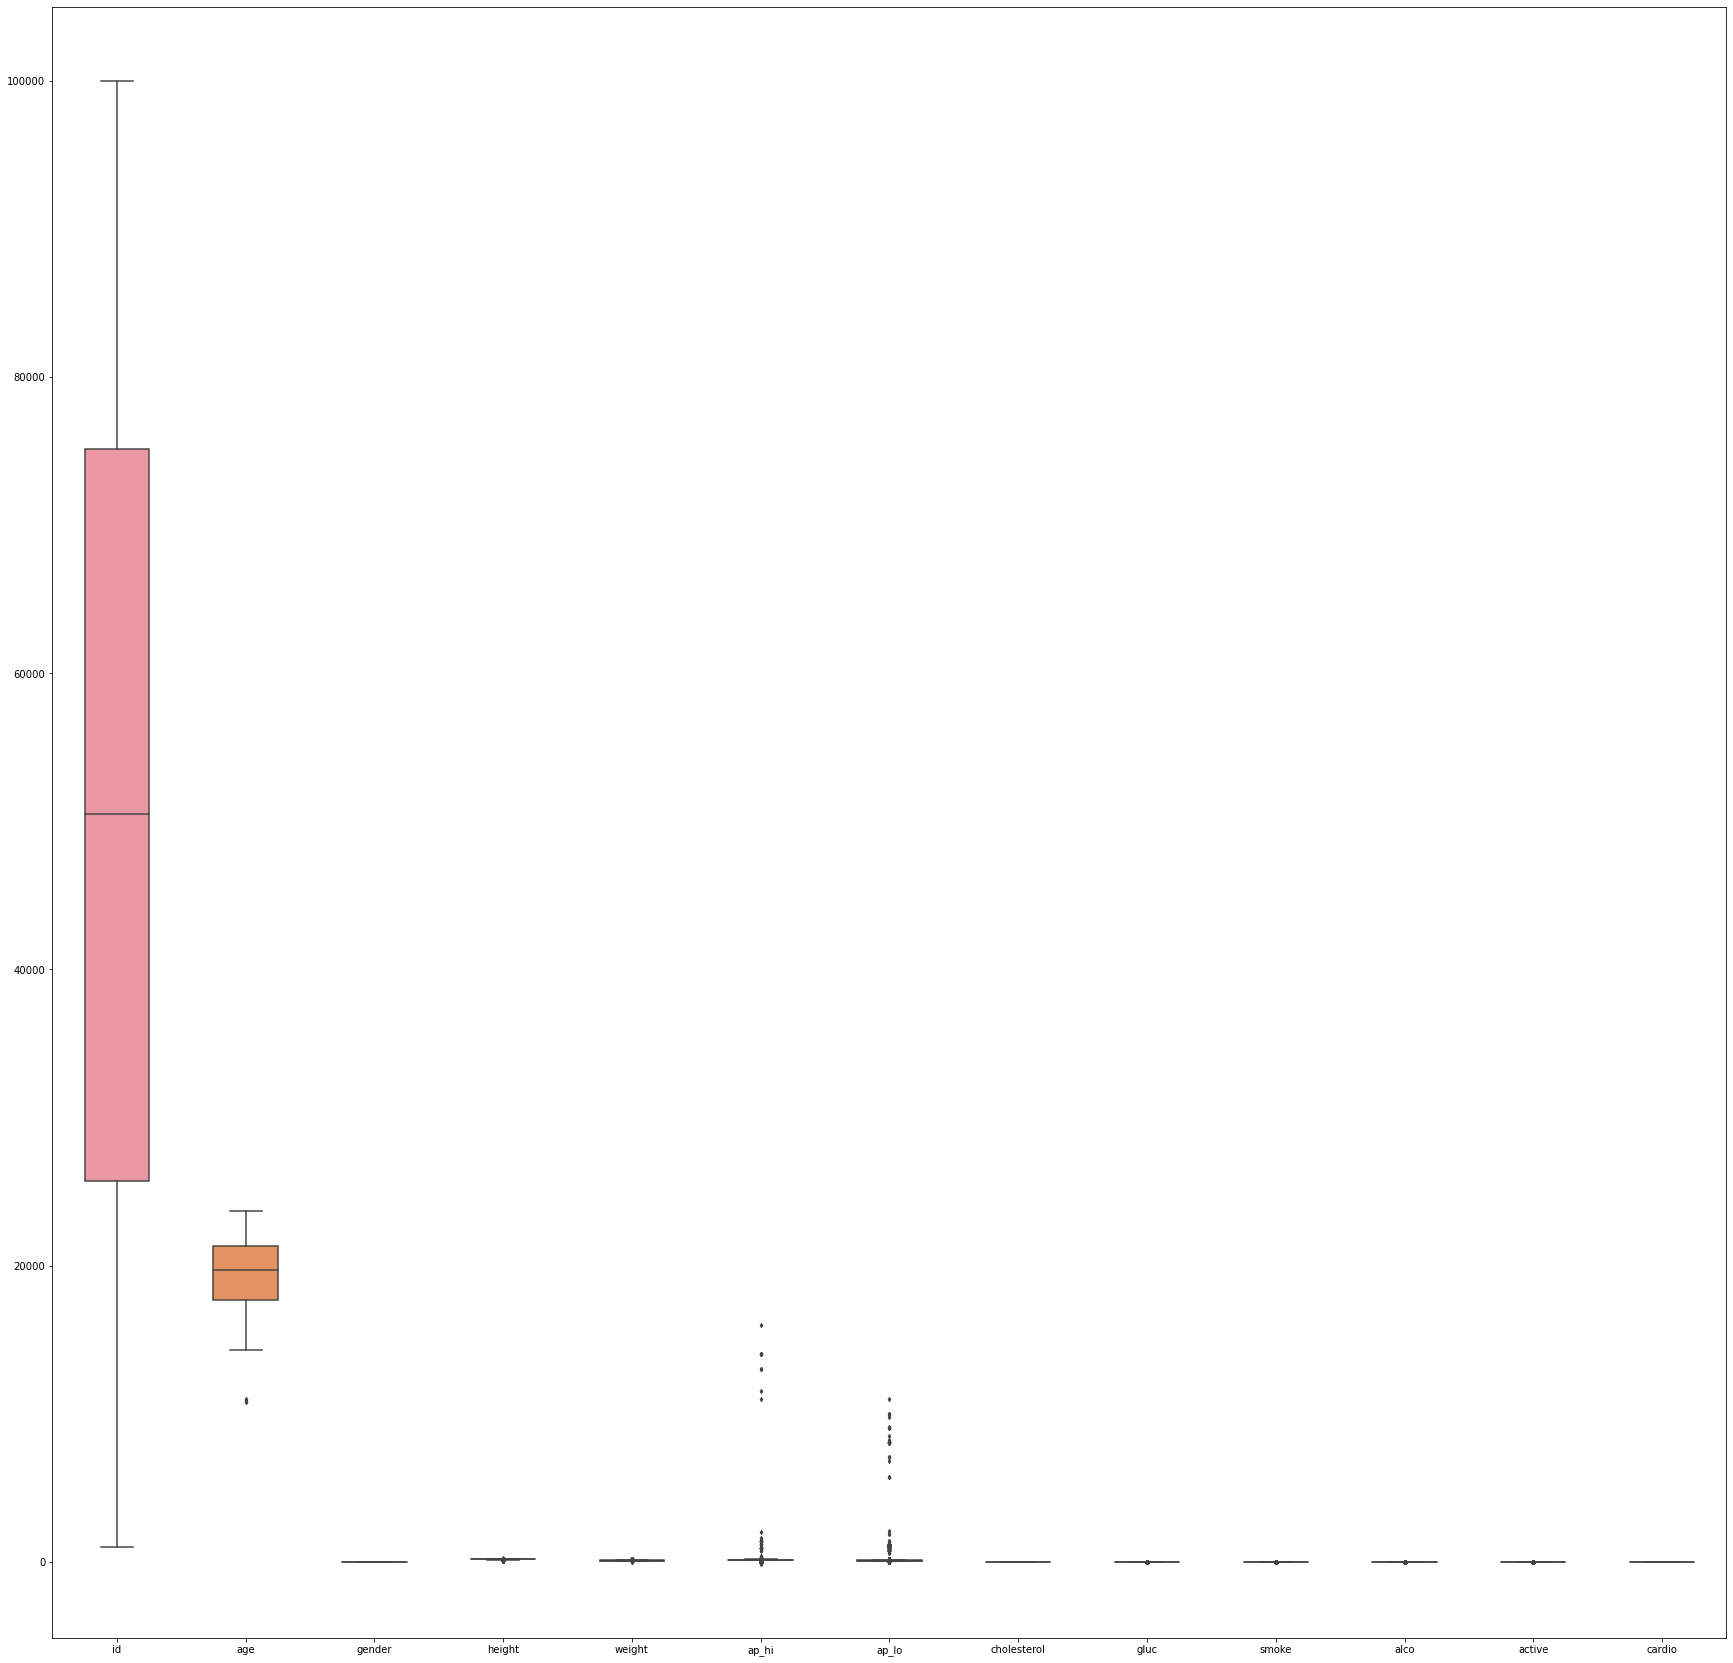

In [11]:
fig, ax = plt.subplots(figsize=(30,30))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

C:\Users\prama\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\prama\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\prama\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\prama\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\prama\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\prama\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Defa

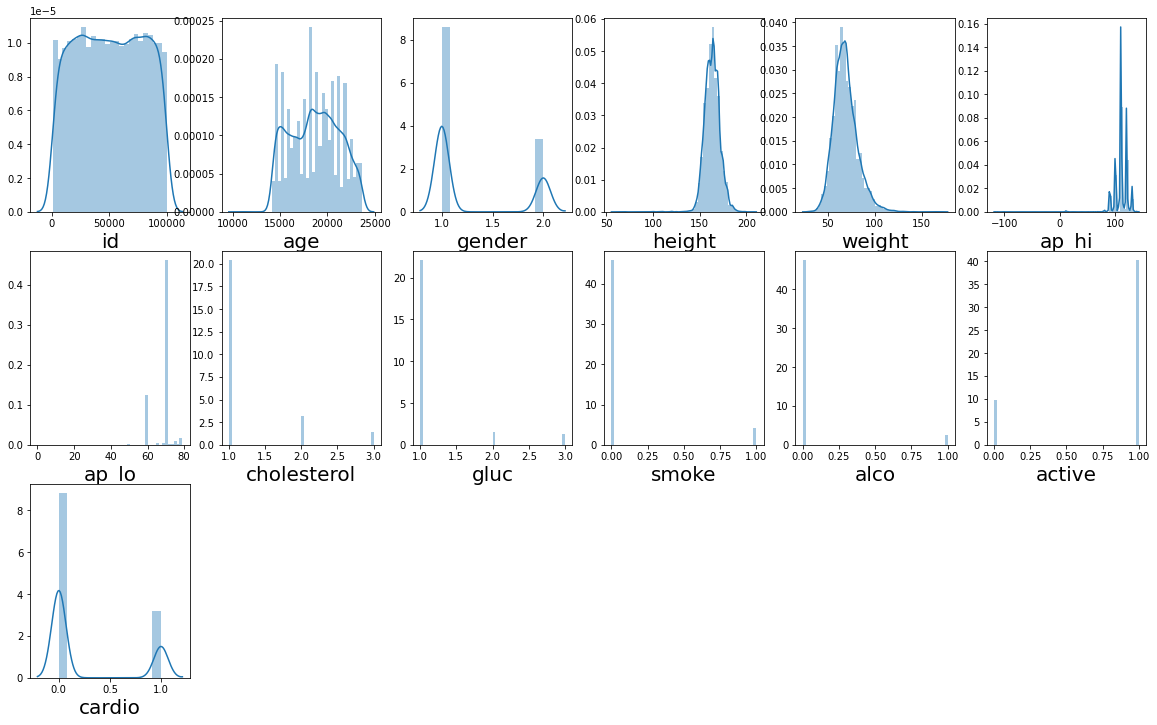

In [12]:
#After reducing outliers and skewness lets check our plots
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=13 :
        ax = plt.subplot(6,6,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [13]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.833480,96.652256,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.772184,189.095191,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-140.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
data.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [15]:
 data.info

<bound method DataFrame.info of           id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0        988  22469       1     155    69.0    130     80            2     2   
1        989  14648       1     163    71.0    110     70            1     1   
2        990  21901       1     165    70.0    120     80            1     1   
3        991  14549       2     165    85.0    120     80            1     1   
4        992  23393       1     155    62.0    120     80            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69296  99993  19240       2     168    76.0    120     80            1     1   
69297  99995  22601       1     158   126.0    140     90            2     2   
69298  99996  19066       2     183   105.0    180     90            3     1   
69299  99998  22431       1     163    72.0    135     80            1     2   
69300  99999  20540       1     170    72.0    120     80            2     1   

       

In [16]:
#Selecting x- label and y label from the given data
X = data.drop(columns = ['cardio'])
Y = data['cardio']

In [17]:
#Lets standardise our data
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [18]:
#From the above vif we conclude that there in no multicollinearity in our data. let's split our data in test and training set.
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size =0.25)

In [19]:
#Prepairing the LOGISTIC REGRESSION MODEL
Linear = LogisticRegression()
Linear.fit(X_train,Y_train)

LogisticRegression()

In [20]:
#Predicting the x_test data
y_pred = Linear.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

In [21]:
#Finding the accuracy of the outcome
accuracy = accuracy_score(Y_test,y_pred)
accuracy

0.7176497749047674

In [22]:
#To check how accurate is our model using confusion matrix
confusion_matrix = confusion_matrix(Y_test,y_pred)
confusion_matrix

array([[6566, 2055],
       [2837, 5868]], dtype=int64)

In [23]:
true_positive = confusion_matrix[0][0]
false_positive = confusion_matrix[0][1]
false_negative = confusion_matrix[1][0]
true_negative = confusion_matrix[1][1]

In [24]:
#Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7176497749047674

In [25]:
#precision
Precision1 = true_positive/(true_positive+false_positive)
Precision1

0.7616285813710706

In [26]:
# Recall
Recall_1 = true_positive/(true_positive+false_negative)
Recall_1

0.6982877804955865

In [27]:
# F1 Score
F1_Score1 = 2*(Recall_1 * Precision1) / (Recall_1 + Precision1)
F1_Score1

0.728584110075455

In [28]:
#Lets find the roc curve of Logistic regression
fpr,tpr, thresholds = roc_curve(Y_test, y_pred)

In [29]:
fpr

array([0.        , 0.23837142, 1.        ])

In [30]:
tpr

array([0.        , 0.67409535, 1.        ])

In [31]:
thresholds

array([2, 1, 0], dtype=int64)

In [32]:
auc = roc_auc_score(Y_test, y_pred)
auc

0.7178619644362533

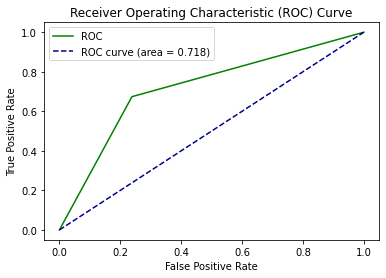

In [33]:
#Plotting the roc cuvrve 
plt.plot(fpr, tpr, color='green', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.3f)'% auc )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
#Hence by the logistic regression we conclude that there is no overfitting

In [120]:
#Applying knn model

In [42]:
#importing the KNN libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV

In [43]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [44]:
y_predict = knn.predict(X_test)
y_predict

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [125]:
# check the model confidence on training data
knn.score(X_train,Y_train)

0.7525541125541125

In [126]:
accuracy1 = accuracy_score(Y_test,y_predict)
accuracy1

0.6285928662126284

In [130]:
#lets try to increase the accuracy using hyperparameter tuning[Grid searchCV]
param_grid = {'algorithm': ['ball_tree', 'kd_tree', 'brute'] ,
                'leaf_size': [5,9,15,23,27,32,38],
                'n_neighbors':[2,4,8,12,14,17,19]
               
               }

In [131]:
Gridsearch = GridSearchCV(knn,param_grid,verbose =3)

In [132]:
Gridsearch.fit(X_train,Y_train)

Fitting 5 folds for each of 147 candidates, totalling 735 fits
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=2 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=2, score=0.583, total=  19.9s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=2 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.8s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=2, score=0.583, total=  20.3s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=2 .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   40.2s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=2, score=0.582, total=  21.3s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=2 .................
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=2, score=0.575, total=  21.1s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=2 .................
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=2, score=0.586, total=  21.5s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=4 .................
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=4, score=0.614, total=  21.9s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=4 .................
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=4, score=0.605, total=  22.9s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=4 .................
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=4, score=0.604, total=  22.1s
[CV] algorithm=ball_tree, leaf_size=5, n_neighbors=4 .................
[CV]  algorithm=ball_tree, leaf_size=5, n_neighbors=4, score=0.599, total=  21.0s


[CV]  algorithm=ball_tree, leaf_size=9, n_neighbors=14, score=0.630, total=  25.1s
[CV] algorithm=ball_tree, leaf_size=9, n_neighbors=14 ................
[CV]  algorithm=ball_tree, leaf_size=9, n_neighbors=14, score=0.636, total=  24.8s
[CV] algorithm=ball_tree, leaf_size=9, n_neighbors=14 ................
[CV]  algorithm=ball_tree, leaf_size=9, n_neighbors=14, score=0.629, total=  25.1s
[CV] algorithm=ball_tree, leaf_size=9, n_neighbors=14 ................
[CV]  algorithm=ball_tree, leaf_size=9, n_neighbors=14, score=0.631, total=  25.7s
[CV] algorithm=ball_tree, leaf_size=9, n_neighbors=17 ................
[CV]  algorithm=ball_tree, leaf_size=9, n_neighbors=17, score=0.639, total=  25.0s
[CV] algorithm=ball_tree, leaf_size=9, n_neighbors=17 ................
[CV]  algorithm=ball_tree, leaf_size=9, n_neighbors=17, score=0.637, total=  26.6s
[CV] algorithm=ball_tree, leaf_size=9, n_neighbors=17 ................
[CV]  algorithm=ball_tree, leaf_size=9, n_neighbors=17, score=0.636, total= 

[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=4, score=0.614, total=  26.6s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=4 ................
[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=4, score=0.605, total=  27.6s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=4 ................
[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=4, score=0.604, total=  25.0s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=4 ................
[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=4, score=0.599, total=  26.4s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=4 ................
[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=4, score=0.606, total=  26.2s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=8 ................
[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=8, score=0.624, total=  28.8s
[CV] algorithm=ball_tree, leaf_size=23, n_neighbors=8 ................
[CV]  algorithm=ball_tree, leaf_size=23, n_neighbors=8, score=0.617, total= 

[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=14, score=0.631, total=  27.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=17 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=17, score=0.639, total=  25.9s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=17 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=17, score=0.637, total=  25.8s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=17 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=17, score=0.636, total=  26.4s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=17 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=17, score=0.633, total=  26.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=17 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=17, score=0.643, total=  25.8s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=19 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=19, score=0.639, 

[CV]  algorithm=ball_tree, leaf_size=38, n_neighbors=4, score=0.604, total=  44.4s
[CV] algorithm=ball_tree, leaf_size=38, n_neighbors=4 ................
[CV]  algorithm=ball_tree, leaf_size=38, n_neighbors=4, score=0.599, total=  43.1s
[CV] algorithm=ball_tree, leaf_size=38, n_neighbors=4 ................
[CV]  algorithm=ball_tree, leaf_size=38, n_neighbors=4, score=0.606, total=  43.9s
[CV] algorithm=ball_tree, leaf_size=38, n_neighbors=8 ................
[CV]  algorithm=ball_tree, leaf_size=38, n_neighbors=8, score=0.624, total=  44.0s
[CV] algorithm=ball_tree, leaf_size=38, n_neighbors=8 ................
[CV]  algorithm=ball_tree, leaf_size=38, n_neighbors=8, score=0.617, total=  46.3s
[CV] algorithm=ball_tree, leaf_size=38, n_neighbors=8 ................
[CV]  algorithm=ball_tree, leaf_size=38, n_neighbors=8, score=0.620, total=  45.9s
[CV] algorithm=ball_tree, leaf_size=38, n_neighbors=8 ................
[CV]  algorithm=ball_tree, leaf_size=38, n_neighbors=8, score=0.623, total= 

[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=17, score=0.637, total=  16.3s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=17 ..................
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=17, score=0.636, total=  15.8s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=17 ..................
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=17, score=0.633, total=  16.0s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=17 ..................
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=17, score=0.643, total=  16.1s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=19 ..................
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=19, score=0.639, total=  16.4s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=19 ..................
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=19, score=0.634, total=  16.6s
[CV] algorithm=kd_tree, leaf_size=5, n_neighbors=19 ..................
[CV]  algorithm=kd_tree, leaf_size=5, n_neighbors=19, score=0.641, total=  16.4s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=8, score=0.624, total=   9.1s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=8 ..................
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=8, score=0.617, total=   9.3s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=8 ..................
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=8, score=0.620, total=   9.1s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=8 ..................
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=8, score=0.623, total=   9.9s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=8 ..................
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=8, score=0.625, total=   9.3s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=12, score=0.635, total=  10.3s
[CV] algorithm=kd_tree, leaf_size=15, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=15, n_neighbors=12, score=0.627, total=  10.3s
[CV] 

[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=17, score=0.643, total=  10.5s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=19 .................
[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=19, score=0.639, total=  11.0s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=19 .................
[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=19, score=0.634, total=  10.8s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=19 .................
[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=19, score=0.641, total=  10.9s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=19 .................
[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=19, score=0.634, total=  11.9s
[CV] algorithm=kd_tree, leaf_size=23, n_neighbors=19 .................
[CV]  algorithm=kd_tree, leaf_size=23, n_neighbors=19, score=0.644, total=  10.9s
[CV] algorithm=kd_tree, leaf_size=27, n_neighbors=2 ..................
[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=2, score=0.583, total=   6.4s
[

[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=8, score=0.623, total=   8.8s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=8 ..................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=8, score=0.625, total=   8.8s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.635, total=   9.4s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.627, total=   9.7s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.633, total=   9.7s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.629, total=   9.7s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.631, total=   9.9s
[C

[CV]  algorithm=kd_tree, leaf_size=38, n_neighbors=19, score=0.641, total=  10.3s
[CV] algorithm=kd_tree, leaf_size=38, n_neighbors=19 .................
[CV]  algorithm=kd_tree, leaf_size=38, n_neighbors=19, score=0.634, total=  10.6s
[CV] algorithm=kd_tree, leaf_size=38, n_neighbors=19 .................
[CV]  algorithm=kd_tree, leaf_size=38, n_neighbors=19, score=0.644, total=  10.5s
[CV] algorithm=brute, leaf_size=5, n_neighbors=2 .....................
[CV]  algorithm=brute, leaf_size=5, n_neighbors=2, score=0.583, total=   7.5s
[CV] algorithm=brute, leaf_size=5, n_neighbors=2 .....................
[CV]  algorithm=brute, leaf_size=5, n_neighbors=2, score=0.583, total=   7.1s
[CV] algorithm=brute, leaf_size=5, n_neighbors=2 .....................
[CV]  algorithm=brute, leaf_size=5, n_neighbors=2, score=0.582, total=   7.1s
[CV] algorithm=brute, leaf_size=5, n_neighbors=2 .....................
[CV]  algorithm=brute, leaf_size=5, n_neighbors=2, score=0.575, total=   7.0s
[CV] algorithm=b

[CV]  algorithm=brute, leaf_size=9, n_neighbors=12, score=0.633, total=   9.4s
[CV] algorithm=brute, leaf_size=9, n_neighbors=12 ....................
[CV]  algorithm=brute, leaf_size=9, n_neighbors=12, score=0.629, total=   9.7s
[CV] algorithm=brute, leaf_size=9, n_neighbors=12 ....................
[CV]  algorithm=brute, leaf_size=9, n_neighbors=12, score=0.631, total=   9.8s
[CV] algorithm=brute, leaf_size=9, n_neighbors=14 ....................
[CV]  algorithm=brute, leaf_size=9, n_neighbors=14, score=0.637, total=  10.6s
[CV] algorithm=brute, leaf_size=9, n_neighbors=14 ....................
[CV]  algorithm=brute, leaf_size=9, n_neighbors=14, score=0.630, total=  10.5s
[CV] algorithm=brute, leaf_size=9, n_neighbors=14 ....................
[CV]  algorithm=brute, leaf_size=9, n_neighbors=14, score=0.636, total=   9.6s
[CV] algorithm=brute, leaf_size=9, n_neighbors=14 ....................
[CV]  algorithm=brute, leaf_size=9, n_neighbors=14, score=0.629, total=  10.0s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=23, n_neighbors=2, score=0.582, total=   7.4s
[CV] algorithm=brute, leaf_size=23, n_neighbors=2 ....................
[CV]  algorithm=brute, leaf_size=23, n_neighbors=2, score=0.575, total=   7.2s
[CV] algorithm=brute, leaf_size=23, n_neighbors=2 ....................
[CV]  algorithm=brute, leaf_size=23, n_neighbors=2, score=0.586, total=   7.2s
[CV] algorithm=brute, leaf_size=23, n_neighbors=4 ....................
[CV]  algorithm=brute, leaf_size=23, n_neighbors=4, score=0.614, total=  10.8s
[CV] algorithm=brute, leaf_size=23, n_neighbors=4 ....................
[CV]  algorithm=brute, leaf_size=23, n_neighbors=4, score=0.605, total=  10.4s
[CV] algorithm=brute, leaf_size=23, n_neighbors=4 ....................
[CV]  algorithm=brute, leaf_size=23, n_neighbors=4, score=0.604, total=   9.7s
[CV] algorithm=brute, leaf_size=23, n_neighbors=4 ....................
[CV]  algorithm=brute, leaf_size=23, n_neighbors=4, score=0.599, total=   9.9s
[CV] algorithm=brute,

[CV]  algorithm=brute, leaf_size=27, n_neighbors=14, score=0.636, total=   9.4s
[CV] algorithm=brute, leaf_size=27, n_neighbors=14 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=14, score=0.629, total=   9.8s
[CV] algorithm=brute, leaf_size=27, n_neighbors=14 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=14, score=0.631, total=   9.9s
[CV] algorithm=brute, leaf_size=27, n_neighbors=17 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=17, score=0.639, total=  10.5s
[CV] algorithm=brute, leaf_size=27, n_neighbors=17 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=17, score=0.637, total=  10.3s
[CV] algorithm=brute, leaf_size=27, n_neighbors=17 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=17, score=0.636, total=   9.5s
[CV] algorithm=brute, leaf_size=27, n_neighbors=17 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=17, score=0.633, total=   9.9s
[CV] algorithm

[CV]  algorithm=brute, leaf_size=38, n_neighbors=4, score=0.604, total=  11.9s
[CV] algorithm=brute, leaf_size=38, n_neighbors=4 ....................
[CV]  algorithm=brute, leaf_size=38, n_neighbors=4, score=0.599, total=  12.4s
[CV] algorithm=brute, leaf_size=38, n_neighbors=4 ....................
[CV]  algorithm=brute, leaf_size=38, n_neighbors=4, score=0.606, total=  12.8s
[CV] algorithm=brute, leaf_size=38, n_neighbors=8 ....................
[CV]  algorithm=brute, leaf_size=38, n_neighbors=8, score=0.624, total=  14.2s
[CV] algorithm=brute, leaf_size=38, n_neighbors=8 ....................
[CV]  algorithm=brute, leaf_size=38, n_neighbors=8, score=0.617, total=  13.7s
[CV] algorithm=brute, leaf_size=38, n_neighbors=8 ....................
[CV]  algorithm=brute, leaf_size=38, n_neighbors=8, score=0.620, total=  13.1s
[CV] algorithm=brute, leaf_size=38, n_neighbors=8 ....................
[CV]  algorithm=brute, leaf_size=38, n_neighbors=8, score=0.623, total=  12.2s
[CV] algorithm=brute,

[Parallel(n_jobs=1)]: Done 735 out of 735 | elapsed: 215.2min finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [5, 9, 15, 23, 27, 32, 38],
                         'n_neighbors': [2, 4, 8, 12, 14, 17, 19]},
             verbose=3)

In [133]:
#Getting the best parameters from above data.
Gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 5, 'n_neighbors': 19}

In [134]:
#Fitting the best parameters into the  KNN model
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size = 5, n_neighbors = 19)

In [135]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=5, n_neighbors=19)

In [136]:
knn.score(X_test,Y_test)

0.6500057716726307

In [137]:
#Checking the prediction using hyper parameter
y_predict  = knn.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [138]:
accuracy2 = accuracy_score(Y_test,y_predict)
accuracy2

0.6500057716726307

In [142]:
#Great... when compared accuracy1 with accuracy2 , here our accuracy score increased.

In [34]:
#TO plot ROC,AUC curves for two models at a time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd 
from sklearn.metrics import plot_roc_curve
import warnings
warnings.filterwarnings('ignore')

In [35]:
Linear = LogisticRegression()
Linear.fit(X_train,Y_train)

LogisticRegression()

In [36]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [37]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size =0.25)

In [39]:
Linear.score(X_test,Y_test)

0.7215167955673554

In [40]:
knn.score(X_test,Y_test)

0.718400092346762

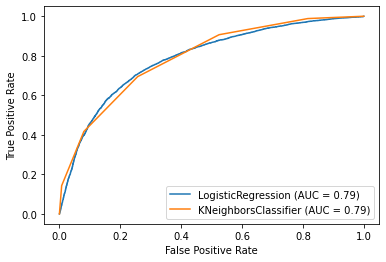

In [41]:
 disp = plot_roc_curve(Linear,X_test,Y_test)

plot_roc_curve(knn,X_test,Y_test,ax=disp.ax_)

In [ ]:
#we are considering healthy people as tested negative
#Conclusion: So by verifying the above confusion marix, we can conclude that there will be  cardiovascular disease 
#suffering people more than healthy people.